## To identify payment fraud with machine learning, we need to train a machine learning model for classifying fradulent and non-fradulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud.

### Dataset for this task is taken from kaggle, which contains historical information about fradulent transactions which can be used to detect fraud in online payments.

# Import Libraries as required

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
payment_data = pd.read_csv("Payments_log.csv")

In [3]:
payment_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Check for Null Values

In [4]:
payment_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### So there are no null values in the dataset

# Check for the types of transactions

In [9]:
type1 = payment_data.type.value_counts()
transactions = type1.index

### Let's visualize types of transactions

([<matplotlib.patches.Wedge at 0x2e1534a90>,
 [Text(0.49426122663384003, 0.9827033325711335, 'CASH_OUT'),
  Text(-1.0906766219942048, -0.1429143318051433, 'PAYMENT'),
  Text(0.3384112332518691, -1.046650771369777, 'CASH_IN'),
  Text(1.0495474656709025, -0.3293176541028222, 'TRANSFER'),
  Text(1.0997698357971, -0.022501294869852733, 'DEBIT')],
 [Text(0.26959703270936725, 0.5360199995842546, '35.2%'),
  Text(-0.594914521087748, -0.07795327189371452, '33.8%'),
  Text(0.1845879454101104, -0.5709004207471511, '22.0%'),
  Text(0.5724804358204921, -0.17962781132881211, '8.4%'),
  Text(0.5998744558893272, -0.012273433565374218, '0.7%')])

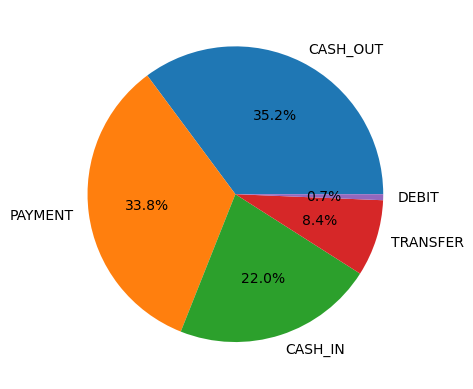

In [11]:
plt.pie(type1,labels=transactions,autopct='%1.1f%%')

## Now let's check the correlation between the features of the data with the isFraud column

In [15]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [23]:
df = payment_data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

<Axes: >

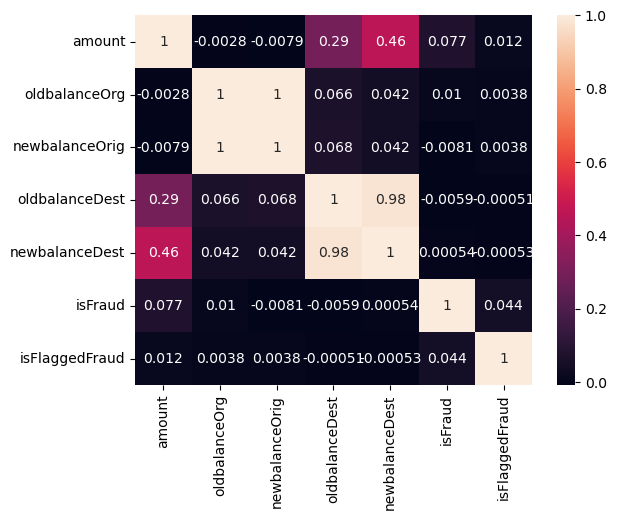

In [24]:
correlation  = df.corr()
sns.heatmap(correlation,annot=True)

# Replace Categorical values of type into numerical by mapping

In [51]:
payment_data["type"] = payment_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

payment_data["isFraud"] = payment_data["isFraud"].map({0: "No Fraud", 1: "Fraud"})


# Divide the data into X and y for training the classification algorithm

In [45]:
from sklearn.model_selection import train_test_split
X = np.array(payment_data[["type","amount","oldbalanceOrg","newbalanceOrig"]])

In [52]:
y = np.array(payment_data[['isFraud']])

# Split data into training and testing datasets

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Import Decision Tree classifier algorithm

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
print(model.score(X_test,y_test))

0.9996856640817776


# Predictions

In [56]:
#features = [type,amount,oldbalanceOrg,newbalanceOrig]
features = np.array([[4,9000.60,9000.60,0.0]])
model.predict(features)

array(['Fraud'], dtype=object)